<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/food_bad_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./food_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)

,star grade,review
17,2.0,냉정히 말해서 아무런효과도 체감이 안됐었습니다. 죄송하지만 후기는 거짓없이 남길게요😥
42,1.5,뉴스... 사기... 호구...
69,1.0,넘 맛이 없어요..\n그리고 이정도 성분이면 이온음료가 더 낫다는 말에 쉽게 반박할...
72,1.0,핵비려요 진짜맛없음ㅠ
78,2.0,그닥..효과 모르겠음. .뭐가 좋은건지
108,2.0,딱히 기운 나는것도 아니고 레몬맛은 안마셔봐서 모르겠는데 복숭아맛은 복숭아 향도 안...
148,1.0,효과 좋다라는 후기에 완전 속았네요.....\n\n다 개뻥임.....ㅜ.ㅜ\n\n야...
177,1.5,단맛밖에 느껴지지 않는 말차.. 한잔을 제대로 못먹고 다 나눔했어요.
190,2.0,저에게는 단 맛이 너무 강했어요. 그리고 꺼내어 먹기에 포장이 참 별로인 것 같아요.
208,1.0,ㅜ ㅜ 기대 많이 했는데.. 효과가.... 모르겠습니다.


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4788,), (4788,), (1596,), (1596,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  76727      0 --:--:-- --:--:-- --:--:-- 76727


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

1679    정말 맛있어요맛있는 익은 김치가 들어있는 김치만두를 찾기가 너무 힘들었는데 인생만두...
4747    몸에 좋은건 항상 맛없었는데 이건 너무 맛있어요받은지 일째인데 꾸준히 리터 이상 물...
4597    처음에는 좀 질기고 뻑뻑한 느낌인데 씹다보면 고소하고 단백질이라 포만감도 있고 좋은...
2708                 단백질바 처음 먹어봐서 걱정했는데생각보다 맛이 좋아 먹기 편하네요
3080    작년에 시키신 분들이 꽤 있네요 저도 믿고 부푼마음에 기다려 받았는데 평점 역시 이...
                              ...                        
2341          샤인클링 피치클링 라봉클링 셋다 펀딩해봤는데요샤인피치라봉 순으로 맛있는것같아요
409     온쫄면은 사실 한번도 안먹어봐서 온쫄면은 뺄까 말까 고민했는데 괜한 걱정이었어요 저...
6296                      꾸준히 잘 먹고 있습니다 몸의 변화는 아직 잘 모르겠어요
2351                                         부담없이 좋은것 같아요
214                                            쏘쏘합니다무난합니다
Name: review, Length: 4788, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['정말',
  '맛있',
  '어요',
  '!',
  '!',
  '맛있',
  '익',
  '김치',
  '어',
  '김치',
  '만두',
  '찾',
  '기',
  '너무',
  '힘들',
  '었',
  '는데',
  '인생',
  '만두',
  '찾',
  '았',
  '네요',
  '!',
  '!!!',
  '넘',
  '맛있',
  '어요',
  '구워',
  '먹',
  '어도',
  '맛있',
  '고',
  '쪄',
  '먹',
  '어도',
  '맛있',
  '고',
  '만',
  '두국',
  '을',
  '해',
  '먹',
  '어도',
  '넘',
  '맛있',
  '어요',
  'ㅠㅠㅠㅠㅠ',
  '정말',
  '짱',
  '맛'],
 ['몸',
  '건',
  '항상',
  '맛없',
  '었',
  '는데',
  '이건',
  '너무',
  '맛있',
  '어요',
  '~!!!',
  '은지',
  '3',
  '째',
  '인데',
  ',',
  '꾸준히',
  '1',
  '.',
  '5',
  '리터',
  '이상',
  '물',
  '을',
  '섭취',
  '고',
  '습니다',
  '.',
  '맛',
  '과하',
  '게',
  '인공',
  '고',
  '적당히',
  '맛있',
  '습니다',
  '.',
  '근래',
  '펀딩',
  '했',
  '던',
  '젤',
  '와요',
  '!',
  '!',
  '앵',
  '콜',
  '펀딩',
  '제발',
  '해',
  '세요',
  '~~~',
  '부모',
  '님',
  '께',
  '도',
  '사',
  '드리',
  '고',
  '친구',
  '직장',
  '동료',
  '에게',
  '도',
  '선물',
  '해',
  '고',
  '어요',
  '!'],
 ['처음',
  '질기',
  '고',
  '뻑뻑',
  '느낌',
  '인데',
  '씹',
  '다',
  '면',
  '고소',
  '고',
  '단백질',


In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
texts = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(texts)

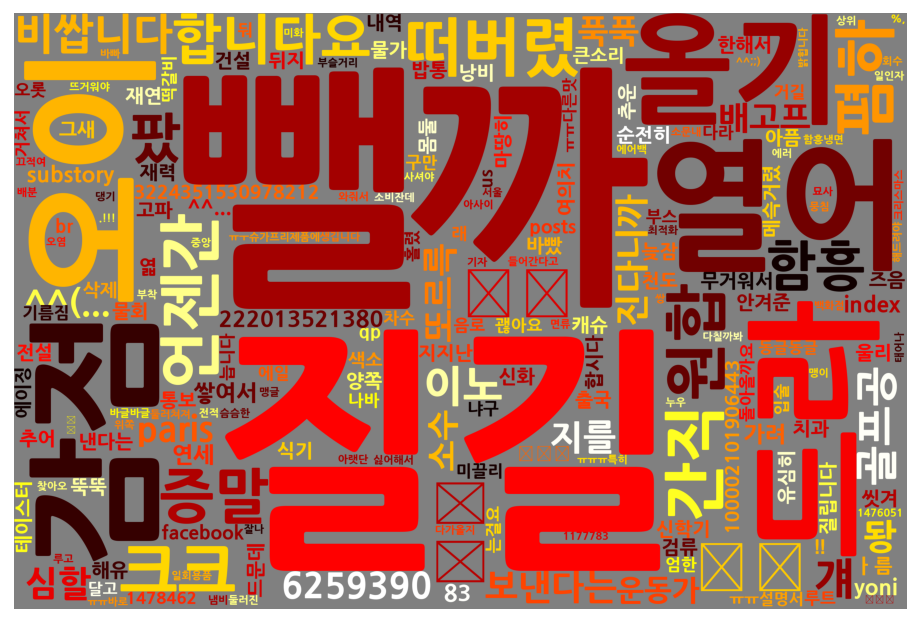

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()